<a href="https://colab.research.google.com/github/NileshDarekar/Oil-and-Gas-Project/blob/main/Debutanizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The cell below was added to re-run this cell and make sure `numpy` is loaded.
# Once the error is fixed, you can delete this cell.
# IOfHMnz8cRFN

**The Dataset and its description are from “Soft Sensors for monitoring and Control of industrial Processes” Book.**
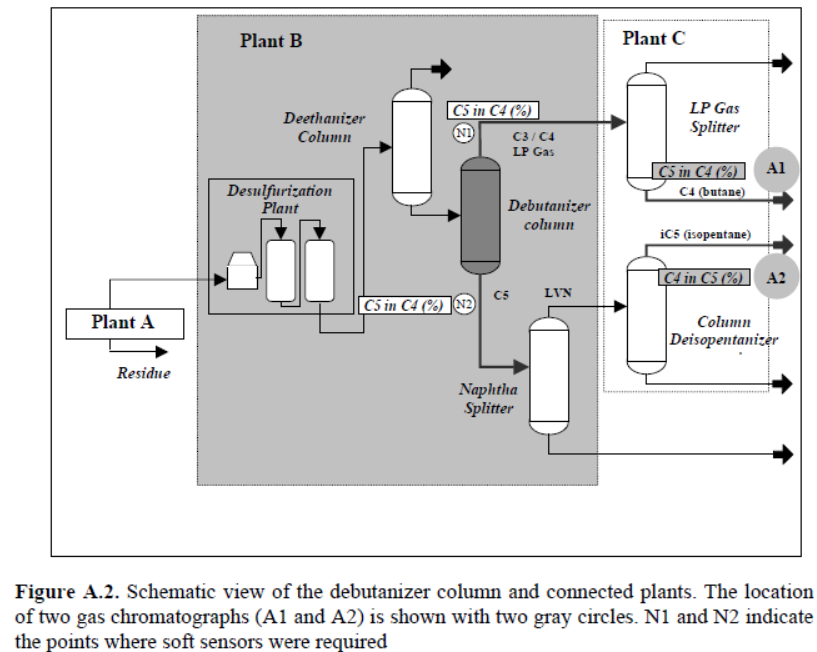

The Debutanizer Column is part of a desulfuring and naphtha splitter plant, shown above, where two gray circles, A1 and A2, can be recognized. They represent the location of two gas chromatographs whose data were used to design soft sensors, while the two white circles, N1 and N2, indicate the points where soft sensors were required.

In particular, data acquired by the device A2, i.e., the C4 (butane) content in the bottom flow to stock have been used as a study case for the design of the soft sensor named N2.

The debutanizer column C3 (propane) and C4 (butane) are removed as overheads from the naphtha stream.

The debutanizer column is required to:

Ensure sufficient fractionation in the debutanizer;

maximize the C5 (Stabilized gasoline) content in the debutanizer overheads (LP gas splitter feed), while respecting the limit enforced by law;

minimize the C4 (butane) content in the debutanizer bottoms (Naphtha splitter feed)

A detailed Scheme of the debutanizer is show below where a number of sensors, indicated with circles, are installed on the plant to monitor product quality. The subset of sensors relevant to the application described, indicated with gray circles, is listed below together with the corresponding description.

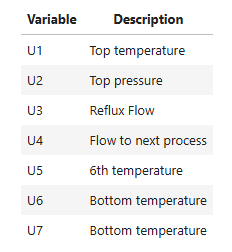

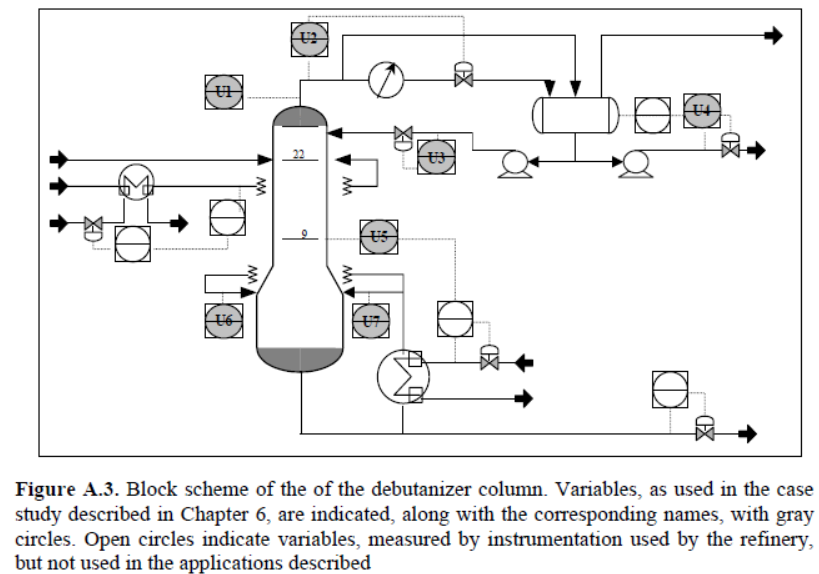

The C4 Content in the debutanizer bottoms, i.e, the soft sensor output, is measured on the overheads of the deisopentanizer column, as can be observed in first figure, where the location of the measuring device is indicated by the gray circle named A2. It measures the C4 Content in the flow to stock that can all assumed to be coming out of the debutanizer bottoms.

Debutanizer columns are standard units in petroleum refineries and are used to convert raw naphtha feed into LPG (as top product) and gasoline (as bottom product). The butane (C4) content in gasoline product is desired to be kept low and is monitored regularly via gas chromatography. However, the location of the chromatograph sensor is downstream of the debutanizer column which introduces a delay in C4 content data availability. For better product quality control, real-time knowledge of C4 content is needed. For this, a soft sensor is desired
that can predict C4 content using other process data (as shown in Figure A6) around the column which influence butane content in bottoms product.

The dataset contains 2394 samples of input-output process values. Note that the dataset is provided in its normalized form and the output values have been translated by 8 samples to compensate for the effect of the time delay. SVR and ANN have been used for soft sensor development in Chapters 7 and 11, respectively.

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read data
data = np.loadtxt('/content/drive/MyDrive/DB/debutanizer_data.txt', skiprows=5)

In [ ]:
column_names = {i:j for i,j in enumerate(['top Temperature','top Pressure','reflux flow','flow to next process','6th tray Temperature', 'bottom Temperature 1','bottom Temperature 2'
                                          ,'C4 content'])}
data_df = pd.DataFrame(data).rename(columns=column_names )
data_df.describe()

,top Temperature,top Pressure,reflux flow,flow to next process,6th tray Temperature,bottom Temperature 1,bottom Temperature 2,C4 content
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,0.283894,0.667847,0.598467,0.435948,0.658086,0.620741,0.589397,0.267788
std,0.103143,0.057690,0.198581,0.138237,0.127054,0.165116,0.173251,0.158943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224004,0.653819,0.500390,0.363369,0.608661,0.481804,0.445001,0.169188
50%,0.263995,0.671915,0.624269,0.396288,0.694644,0.639585,0.600959,0.246857
75%,0.325607,0.690943,0.742784,0.518144,0.730119,0.755050,0.741387,0.318061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


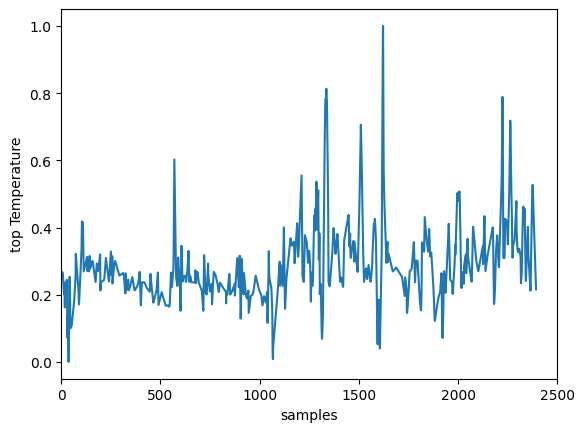

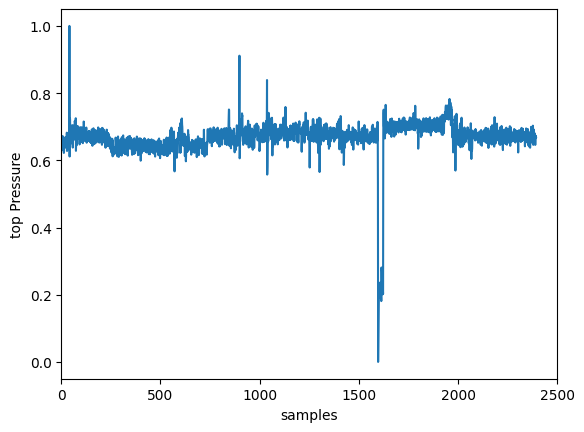

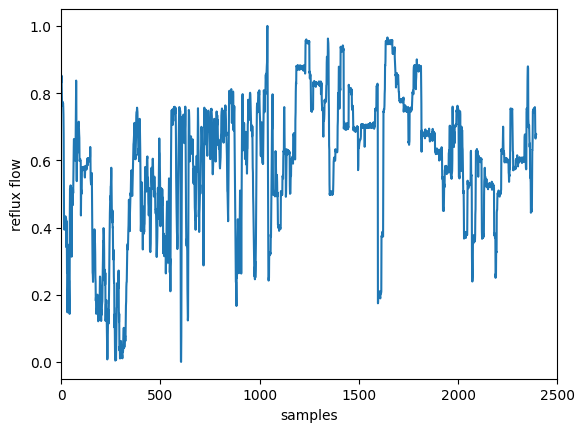

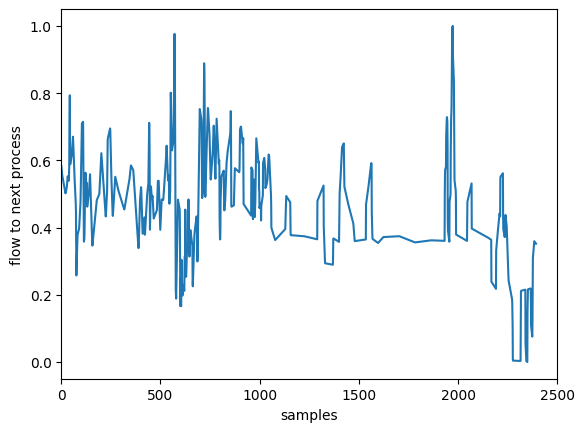

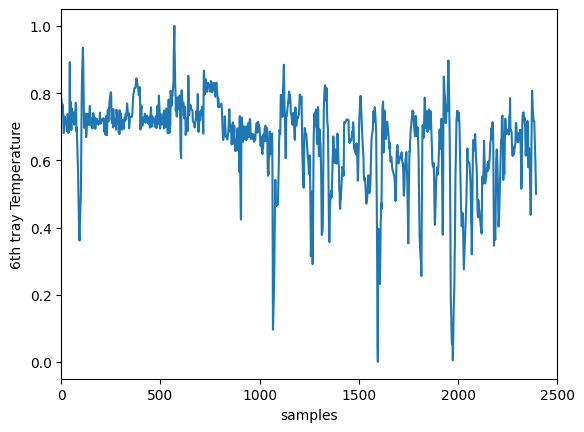

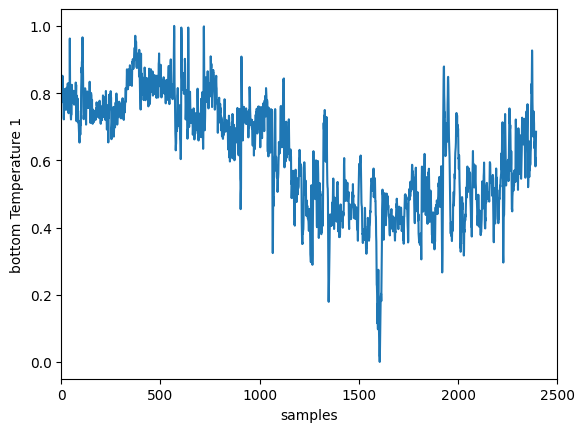

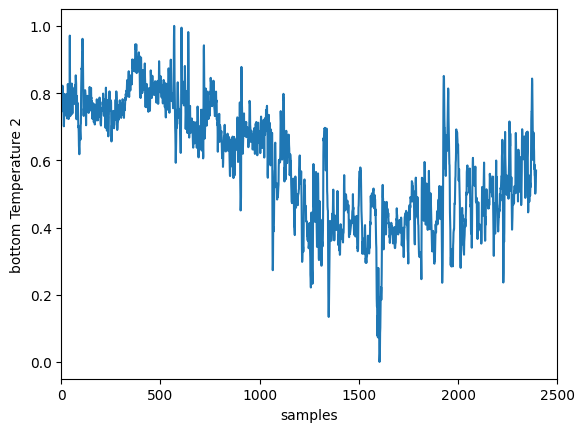

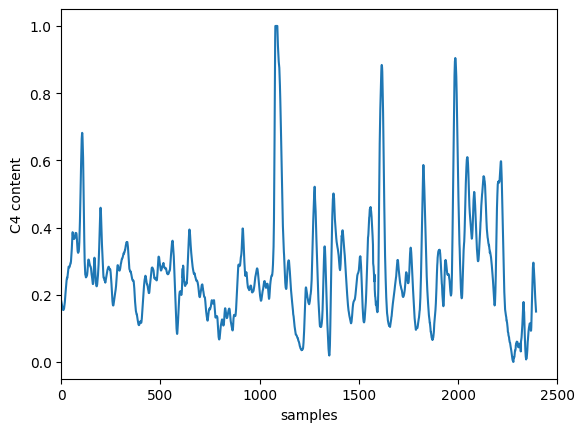

In [ ]:
for i in range(8):
    plt.figure()
    plt.plot(data[:,i])
    plt.ylabel(column_names[i])
    plt.xlabel('samples')
    plt.xlim((0,2500))

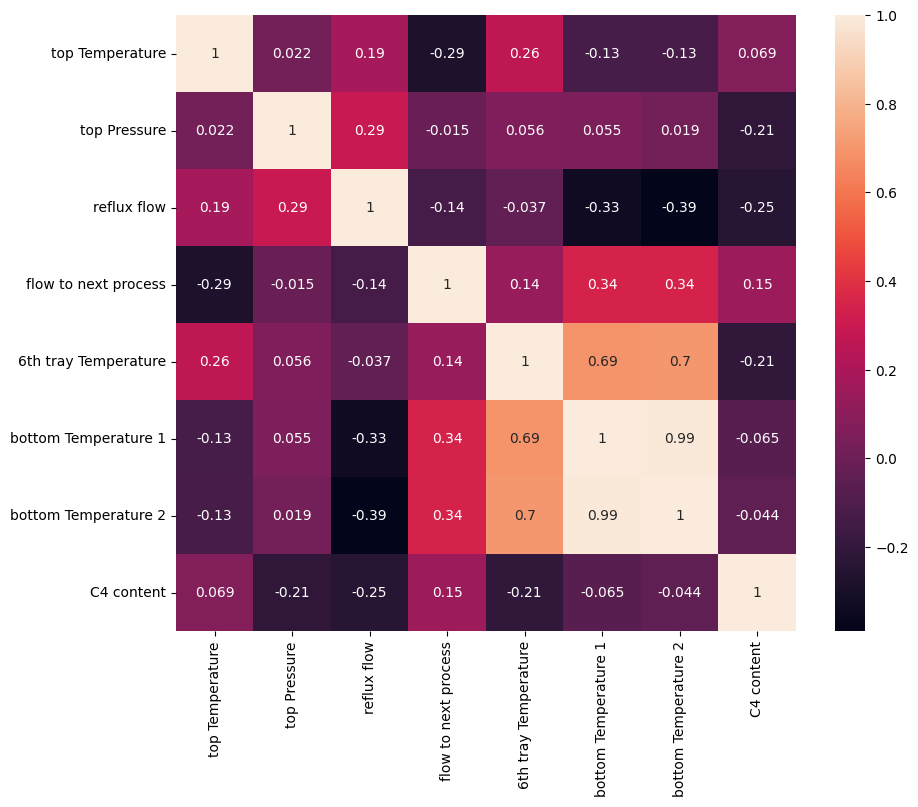

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
corr = data_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

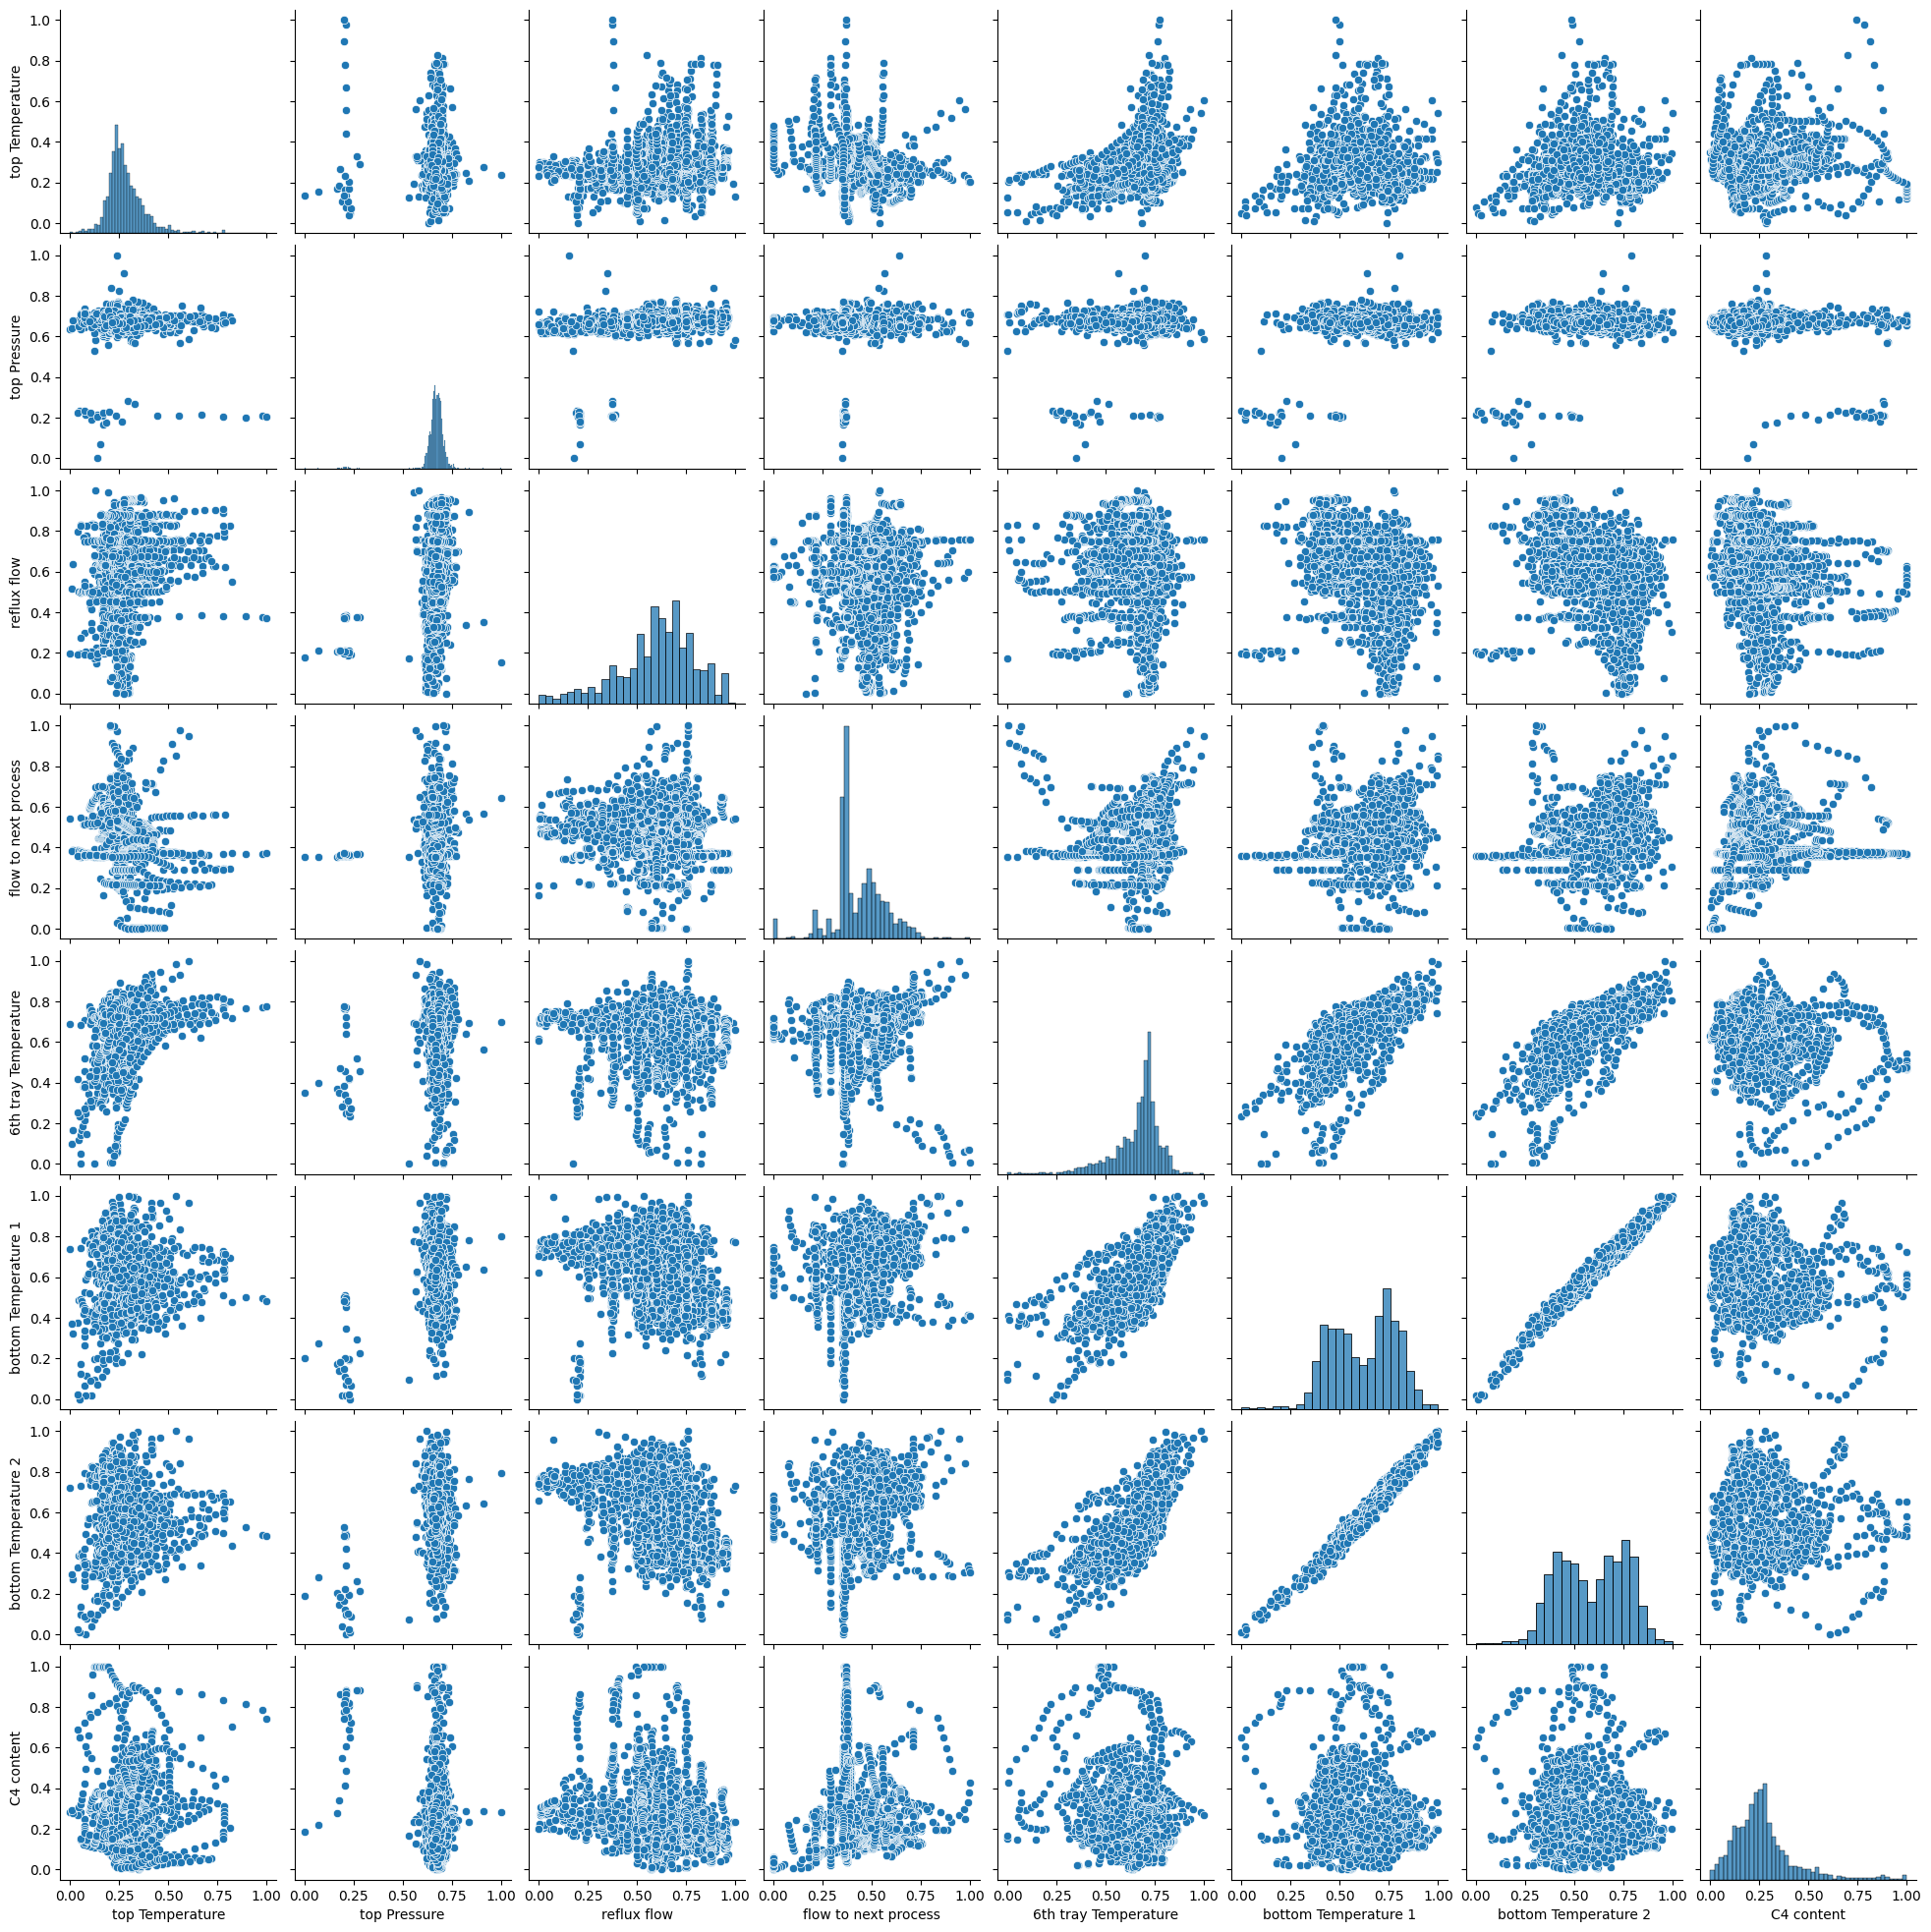

In [ ]:
sns.pairplot(data_df)

In [ ]:
# separate train and test data
from sklearn.model_selection import train_test_split
X = data[:,0:-1]
y = data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [ ]:
# fit SVR model via grid-search
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
model = SVR(epsilon=0.05)
param_grid = [{'gamma': np.linspace(1,10,10), 'C': np.linspace(0.01,500,10)}]
gs = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=2, verbose=0)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'C': np.float64(55.56444444444444), 'gamma': np.float64(4.0)}


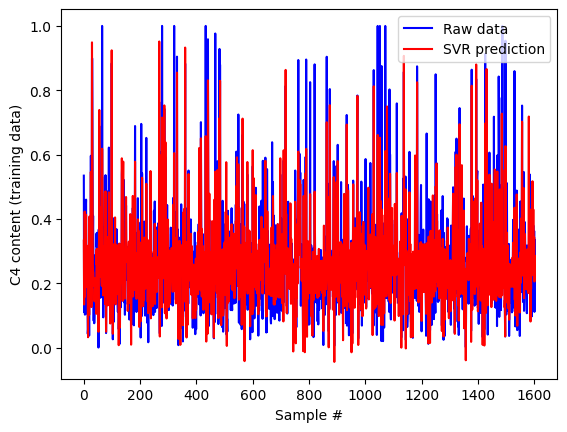

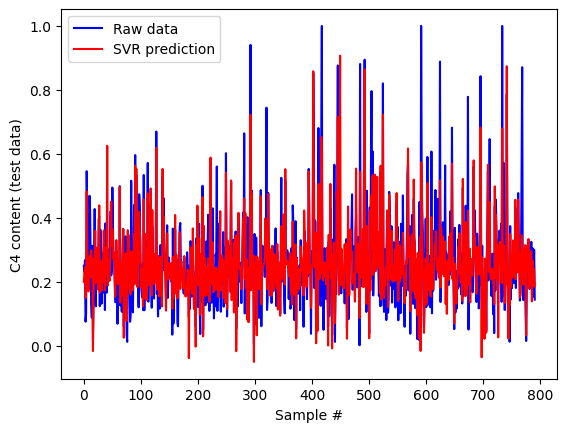

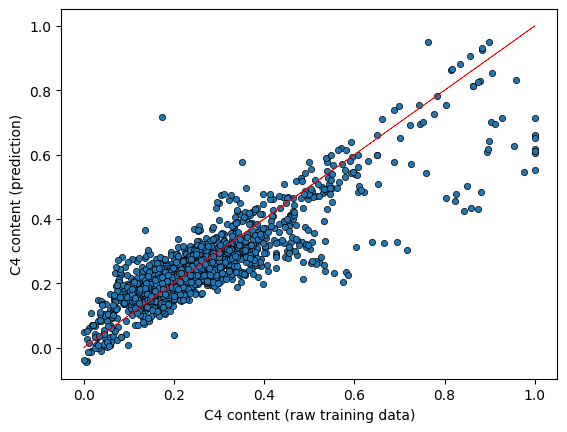

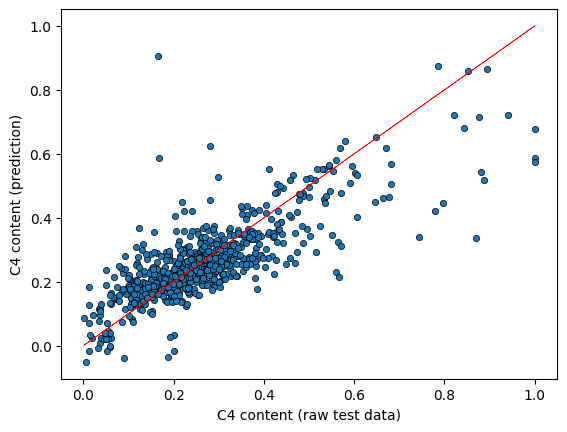

In [ ]:
# plots of raw and predicted data
# Predict on training and test data
y_train_predicted = gs.best_estimator_.predict(X_train)
y_test_predicted = gs.best_estimator_.predict(X_test)

plt.figure()
plt.plot(y_train, 'b',  label = 'Raw data')
plt.plot(y_train_predicted, 'r', label = 'SVR prediction')
plt.ylabel('C4 content (training data)')
plt.xlabel('Sample #')
plt.legend()
plt.show()

plt.figure()
plt.plot(y_test, 'b',  label = 'Raw data')
plt.plot(y_test_predicted, 'r',  label = 'SVR prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()
plt.show()

plt.figure()
plt.plot(y_train, y_train_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_train, y_train, '-r', linewidth=0.5)
plt.xlabel('C4 content (raw training data)')
plt.ylabel('C4 content (prediction)')
plt.show()

plt.figure()
plt.plot(y_test, y_test_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_test, y_test, '-r', linewidth=0.5)
plt.xlabel('C4 content (raw test data)')
plt.ylabel('C4 content (prediction)')
plt.show()

In [ ]:
# check training vs test accuracy
from sklearn.metrics import r2_score
print('Accuracy over training data: ', r2_score(y_train, y_train_predicted))
print('Accuracy over test data: ', r2_score(y_test, y_test_predicted))

Accuracy over training data:  0.7488652913556273
Accuracy over test data:  0.6324108161665303


In [ ]:
# random number seed for result reproducibility
from numpy.random import seed
import numpy as np
import matplotlib.pyplot as plt
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
#%% import packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# read data
data = np.loadtxt('/content/drive/MyDrive/DB/debutanizer_data.txt', skiprows=5)

In [ ]:
# separate training, validation, and test data
from sklearn.model_selection import train_test_split
X = data[:,0:-1]
y = data[:,-1][:,np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 100)

# define model
model = Sequential()
model.add(Dense(60, kernel_regularizer=regularizers.L1(0.0000001), activation='relu', kernel_initializer='he_normal', input_shape=(7,)))
model.add(Dense(30, kernel_regularizer=regularizers.L1(0.0000001), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(30, kernel_regularizer=regularizers.L1(0.0000001), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, kernel_regularizer=regularizers.L1(0.0000001)))
# compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.005))
# fit model
es = EarlyStopping(monitor='val_loss', patience=200)
history = model.fit(X_est, y_est, epochs=2000, batch_size=32, validation_data=(X_val, y_val), callbacks=es, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


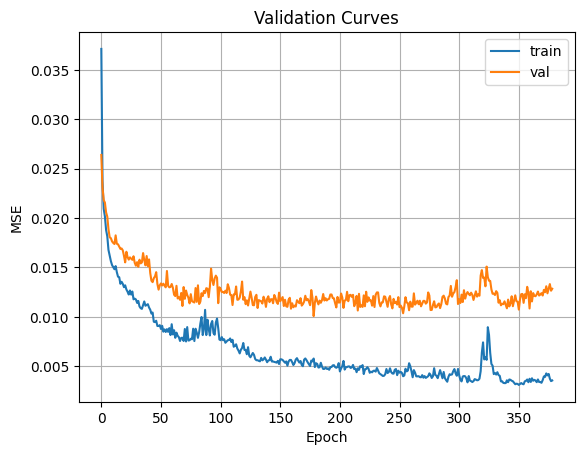

In [ ]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# predict y
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)
y_est_pred = model.predict(X_est)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


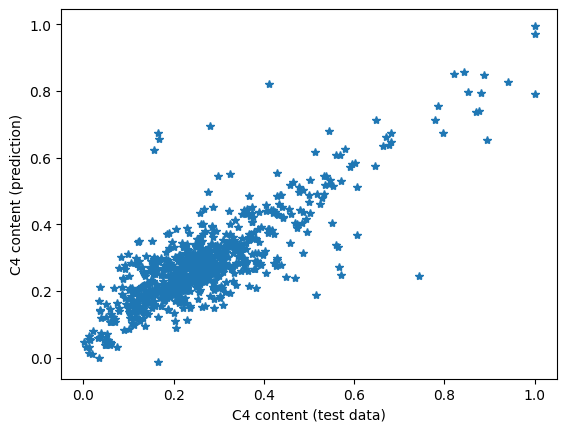

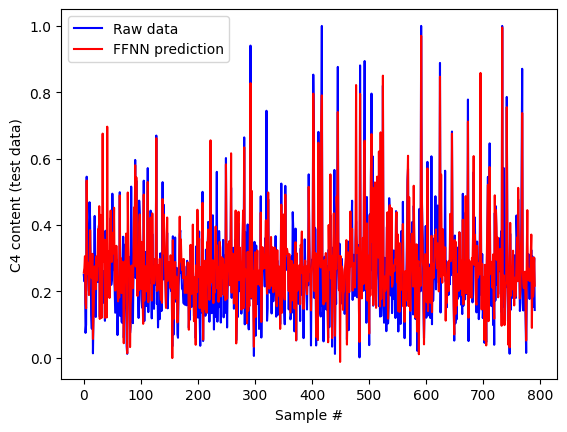

In [ ]:
# plots of raw and predicted data
plt.figure()
plt.plot(y_test, y_test_pred, '*')
plt.xlabel('C4 content (test data)')
plt.ylabel('C4 content (prediction)')

plt.figure()
plt.plot(y_test, 'b', label='Raw data')
plt.plot(y_test_pred, 'r', label='FFNN prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()

Text(0.5, 1.0, 'residual plot')

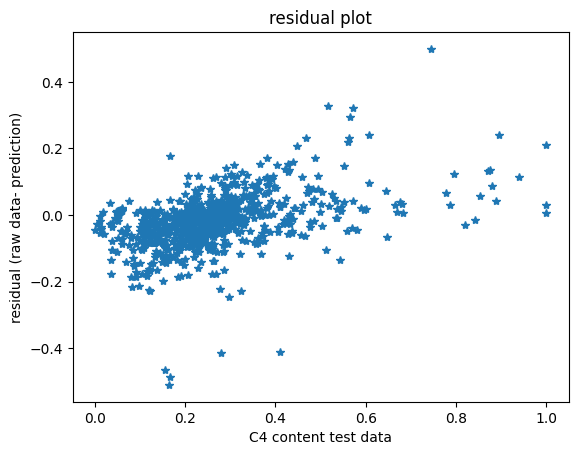

In [ ]:
# residuals
plt.figure()
plt.plot(y_test, y_test-y_test_pred, '*')
plt.xlabel('C4 content test data')
plt.ylabel('residual (raw data- prediction)')
plt.title('residual plot')

In [ ]:
# metrics
from sklearn.metrics import r2_score
print('R2 for test dataset:', r2_score(y_test, y_test_pred))
print('R2:', r2_score(y_val, y_val_pred))
print('R2:', r2_score(y_est, y_est_pred))

R2 for test dataset: 0.6739090291087197
R2: 0.5647803157501403
R2: 0.8435906747841657


In [ ]:
# separate train and test data
from sklearn.model_selection import train_test_split
X = data[:,0:-1]
y = data[:,-1][:,np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train_normal = X_scaler.fit_transform(X_train)
X_test_normal = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_normal = y_scaler.fit_transform(y_train)
y_test_normal = y_scaler.transform(y_test)
# Finding # latents using kFold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

scaler = StandardScaler()

In [ ]:
fit_MSE = []
validate_MSE = []
for n_comp in range(1,8):
    local_fit_MSE = []
    local_validate_MSE = []

    kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)
    for fit_index, validate_index in kfold.split(y_train):
        X_fit_normal = scaler.fit_transform(X_train[fit_index])
        X_validate_normal = scaler.transform(X_train[validate_index])

        y_fit_normal = scaler.fit_transform(y_train[fit_index])
        y_validate_normal = scaler.transform(y_train[validate_index])

        pls = PLSRegression(n_components = n_comp)
        pls.fit(X_fit_normal, y_fit_normal)

        local_fit_MSE.append(mean_squared_error(y_fit_normal, pls.predict(X_fit_normal)))
        local_validate_MSE.append(mean_squared_error(y_validate_normal,
                                                        pls.predict(X_validate_normal)))

    fit_MSE.append(np.mean(local_fit_MSE))
    validate_MSE.append(np.mean(local_validate_MSE))

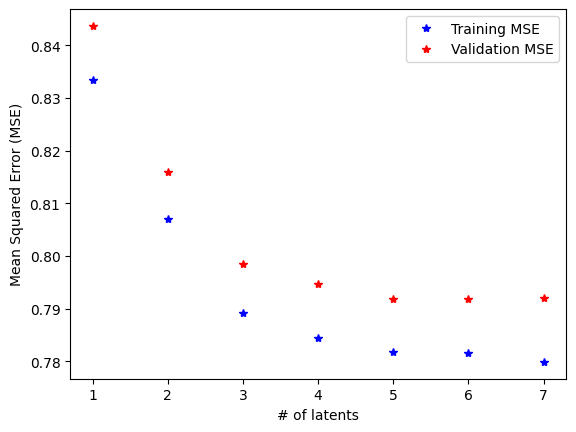

In [ ]:
# plot
plt.figure()
plt.plot(range(1,8), fit_MSE, 'b*', label = 'Training MSE')
plt.plot(range(1,8), validate_MSE, 'r*', label = 'Validation MSE')
plt.xticks(range(1,8))
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('# of latents')
plt.legend()

In [ ]:
# build PLS model
pls = PLSRegression(n_components = 5)
pls.fit(X_train_normal, y_train_normal)
# check training vs test accuracy
print('Accuracy over training data: ', pls.score(X_train_normal, y_train_normal))
print('Accuracy over test data: ', pls.score(X_test_normal, y_test_normal))

Accuracy over training data:  0.21790060542840162
Accuracy over test data:  0.1882053961720188


Text(0, 0.5, 'C4 content (prediction)')

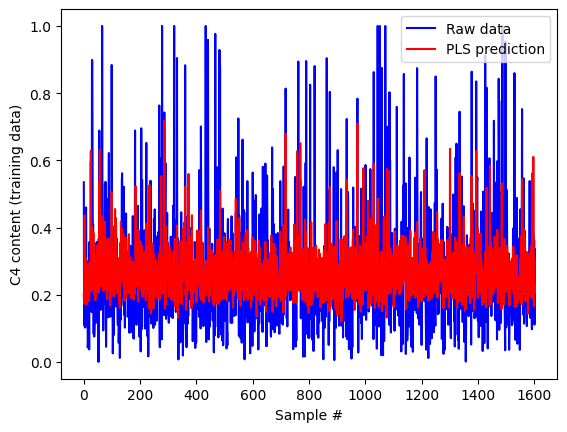

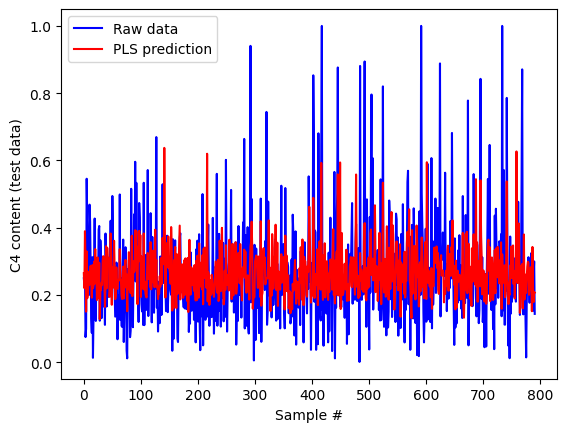

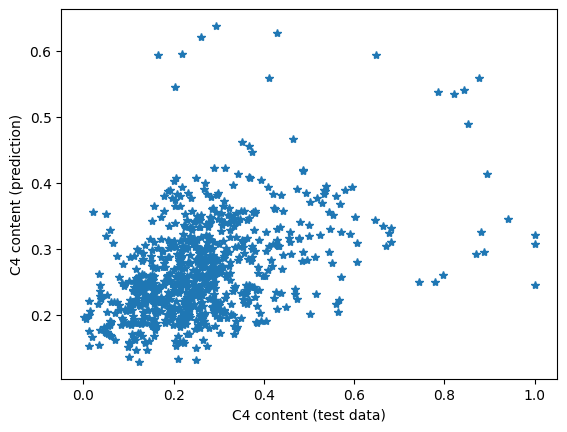

In [ ]:
# plots of raw and predicted data
y_train_normal_predict = pls.predict(X_train_normal)
y_test_normal_predict = pls.predict(X_test_normal)

y_train_predict = y_scaler.inverse_transform(y_train_normal_predict)
y_test_predict = y_scaler.inverse_transform(y_test_normal_predict)


plt.figure()
plt.plot(y_train, 'b',  label = 'Raw data')
plt.plot(y_train_predict, 'r', label = 'PLS prediction')
plt.ylabel('C4 content (training data)')
plt.xlabel('Sample #')
plt.legend()


plt.figure()
plt.plot(y_test, 'b',  label = 'Raw data')
plt.plot(y_test_predict, 'r',  label = 'PLS prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()

plt.figure()
plt.plot(y_test, y_test_predict, '*')
plt.xlabel('C4 content (test data)')
plt.ylabel('C4 content (prediction)')

Text(0.5, 1.0, 'residual plot')

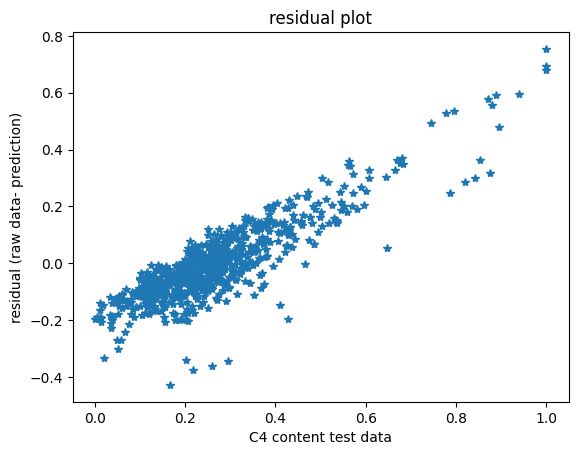

In [ ]:
# residuals
plt.figure()
plt.plot(y_test, y_test-y_test_predict, '*')
plt.xlabel('C4 content test data')
plt.ylabel('residual (raw data- prediction)')
plt.title('residual plot')